# MNIST

## MNISTデータセットとは

- 手書き数字画像60,000枚とテスト画像10,000枚を集めた画像データセットである。
- 手書き数字は「0～9」で、これらに正解ラベルデータが与えられている。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

参考：https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html

## EDA

データの概要
- 手書き数字の画像データ
- データ数： 70000枚(うち学習用42000、テスト用28000)
- 1枚28x28ピクセルの画像(データとしては784個の要素が1行になっている)
- データの1要素は0～255の値
- 大きいほど黒、小さいほど白に近づく
- Target: 画像データそれぞれの正解ラベルデータ  
<br>
- 0～9までそれぞれ4000枚前後
- trainデータ、testデータともに欠損値無し

## データの準備

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

X = train.drop(columns=['label'])
y = train['label']

In [3]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


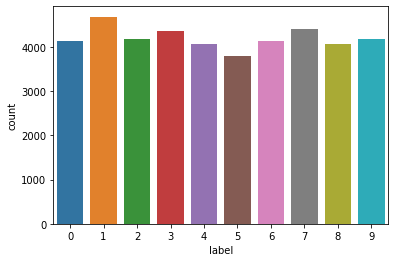

In [4]:
sns.countplot(y)

In [5]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# 画像の形に変形
X_img = X.values.reshape(-1, 28, 28, 1)
test_img = test.values.reshape(-1, 28, 28, 1)

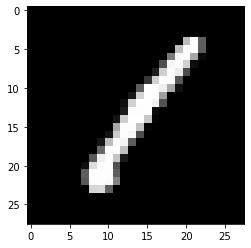

In [8]:
# 試しに画像の表示
plt.imshow(X_img[0][:, :, 0], cmap=plt.get_cmap('gray'),vmin=0, vmax=255)

## データの分割

In [9]:
# from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, random_state=0)

## PyTorch

In [10]:
torch.manual_seed(0)

X_toc = torch.tensor(np.array(X), dtype=torch.float32)
y_toc = torch.tensor(np.array(y), dtype=torch.int64)

# サイズ確認
print(f'X_toc size: {X_toc.size()}')
print(f'y_toc size: {y_toc.size()}')

# model
net = nn.Linear(in_features=784, out_features=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD((net.parameters()), lr=0.05)

X_toc size: torch.Size([42000, 784])
y_toc size: torch.Size([42000])


In [11]:
# 学習
num_epochs = 30
loss_list = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    
    y_pred = net(X_toc)
    
    loss = criterion(y_pred, y_toc)
    
    loss.backward()
    
    loss_list.append(loss.item())
    optimizer.step()

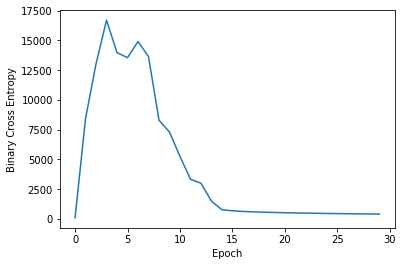

In [12]:
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy')
plt.show()

In [13]:
output = net(X_toc)
print(output.size())

torch.Size([42000, 10])


In [14]:
_, labels_pred = torch.max(output, dim=1)
print(labels_pred)

tensor([1, 0, 1,  ..., 7, 6, 9])


In [15]:
correct_num = (y_toc == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num / len(y_toc)):.3f})')

Correct: 37094(0.883)


## テストデータで評価

In [16]:
test_toc = torch.tensor(np.array(test), dtype=torch.float32)

test_output = net(test_toc)
print(test_output.size())

_, test_labels_pred = torch.max(test_output, dim=1)
print(test_labels_pred)

torch.Size([28000, 10])
tensor([2, 0, 9,  ..., 3, 9, 2])


In [17]:
submit_data = pd.read_csv('input/sample_submission.csv')

submit_data['Label'] = test_labels_pred

# CSVで保存
submit_data.to_csv('input/20191010_sub2.csv', index=False)